In [3]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

X, y = fetch_california_housing(return_X_y=True, as_frame=True)
df = pd.concat([X, y.rename("Target")], axis=1)
df.to_csv("data/california_housing.csv", index=False)

In [5]:
from sklearn.model_selection import train_test_split
from tabpfn import TabPFNRegressor
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
df = pd.read_csv("data/california_housing.csv")
X = df.drop("Target", axis=1).values
y = df["Target"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=500, random_state=42
)

model = TabPFNRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test[:2000])
mse = mean_squared_error(y_test[:2000], y_pred)
r2 = r2_score(y_test[:2000], y_pred)

print(f"MSE: {mse:.4f}, R²: {r2:.4f}")


C:\Users\USER\PycharmProjects\pythonProject5\venv\Lib\site-packages\tabpfn\base.py:101: UserWarning: Downloading model to C:\Users\USER\AppData\Roaming\tabpfn\tabpfn-v2-regressor.ckpt.
  model, bardist, config_ = load_model_criterion_config(


tabpfn-v2-regressor.ckpt:   0%|          | 0.00/44.4M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/37.0 [00:00<?, ?B/s]

C:\Users\USER\PycharmProjects\pythonProject5\venv\Lib\site-packages\tabpfn\regressor.py:460: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider using a GPU or the tabpfn-client API: https://github.com/PriorLabs/tabpfn-client
  check_cpu_warning(


MSE: 0.2715, R²: 0.7964


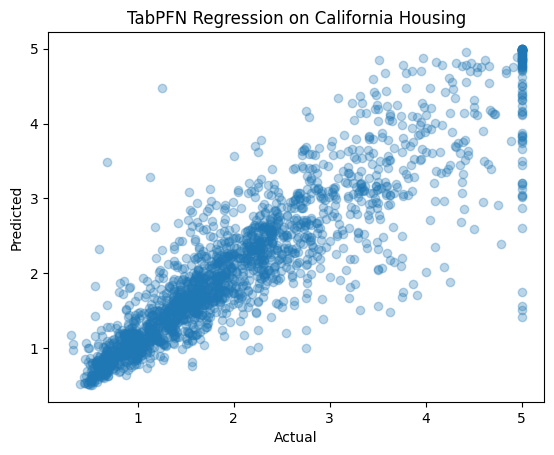

In [7]:
import matplotlib.pyplot as plt
plt.scatter(y_test[:2000], y_pred, alpha=0.3)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("TabPFN Regression on California Housing")
plt.savefig("pred_vs_actual.png")
